# Question 1

__1a(i):__ Pr(Popularity = 'P') = $\frac{7}{10}$

__1a(ii):__ Pr(Popularity = 'NP') = $\frac{3}{10}$

__1a(iii):__ Pr(Price = '\$', Delivery = 'Yes', Cuisine = 'Korean'| Popularity = 'P') = 
Pr(Price = '\$' | Popularity = 'P') $\times$ Pr(Delivery = 'Yes' | Popularity = 'P') $\times$ Pr(Cuisine = 'Korean' | Popularity = 'P') = $\frac{4}{7} \times \frac{4}{7} \times \frac{2}{7}  = \frac{32}{343} \approx 0.0933$

__1a(iv):__ Pr(Price = '\$', Delivery = 'Yes', Cuisine = 'Korean'| Popularity = 'NP') = 
Pr(Price = '\$' | Popularity = 'NP') $\times$ Pr(Delivery = 'Yes' | Popularity = 'NP') $\times$ Pr(Cuisine = 'Korean' | Popularity = 'NP') = $\frac{1}{3} \times \frac{2}{3} \times \frac{1}{3}  = \frac{2}{27} \approx 0.0741$
* 
<font color='blue'>
According to Bayes' Theorem: $P(H|X) = \frac{P(X|H)P(H)}{P(X)} \propto P(X|H) \times P(H)$
</font>

__1b:__ Pr( Popularity = 'P' | Price = '\$', Delivery = 'Yes', Cuisine = 'Korean') $\propto$ Pr(Price = '\$', Delivery = 'Yes', Cuisine = 'Korean'| Popularity = 'P') $\times$ Pr(Popularity = 'P') = $\frac{32}{343} \times \frac{7}{10} \approx 0.0653$

Pr( Popularity = 'NP' | Price = '\$', Delivery = 'Yes', Cuisine = 'Korean') $\propto$ Pr(Price = '\$', Delivery = 'Yes', Cuisine = 'Korean'| Popularity = 'NP') $\times$ Pr(Popularity = 'NP') = $\frac{2}{27} \times \frac{3}{10} \approx 0.0222$


* As 0.0653 > 0.0222, this restaurant is classified as popular

__1c:__ 
* We can use bootstrap method as mentioned in random forest. We randomly choose training dataset size of samples with replacement to include the possibility that there is randomness in the future test data set.
* Next, we build several classifiers and use majority vote to get the final prediction.


__1d:__ Sensitivity(recall)  and specificity can effectively evaluate the classification of data with rare positive examples.
* Sensitivity(recall) = $\frac{TP}{TP + FN}$: measures what percentage of positive tuples are labeled as such
* Specificity = $\frac{TN}{TN + FP}$: measures what percentage of negative tuples are labeled as such



# Question 2

__2a:__ The 1-nearest neighbor of test data**(2.7, 2.7)** calculated by Euclidean distance is **(2.3, 3)**, which has the label **-1**. So we predict the class label of this tuple to be **-1**. <br>
Using the same technique, we obtain **(2.5, 1)**'s nearest neighbor is **(2.0, 1.2):+1**, predicting **(2.5, 1)**'s label as **+1**. 
<br>**(1.5, 2.5)**'s nearest neighbor is **(1.5, 2):-1**, predicting **(1.5, 2.5)**'s label as **-1**. <br>**(1.2, 1)**'s nearest neighbor is **(0.8, 1):-1**, predicting **(1.2, 1)**'s label as **-1**.
* The testing error is $\frac{1}{4} = 0.25$.



__2b:__ The 3 nearest neighbors of **(2.7, 2.7)** calculated by Euclidean distance are **(2.3, 3):-1**, **(2.5, 2):+1** and **(3, 2):+1**. The majorities of them have the label **+1** so we predict **(2.7, 2.7)** to have the label **+1**.<br>
Using the same technique, we obtain **(2.5, 1)**'s 3-nearest neighbors are **(2.0, 1.2):+1**, **(2.5, 2):+1** and **(3, 2):+1**, so we predict **(2.5, 1)**'s label as **+1**. <br>**(1.5, 2.5)**'s 3-nearest neighbors are **(1.5, 2):-1**, **(1.2, 1.9):-1** and **(2.3, 3):-1** so we predict **(1.5, 2.5)**'s label as **-1**. 
<br>**(1.2, 1)**'s 3-nearest neighbors are **(0.8, 1):-1**, **(1, 0.5):+1** and **(2.0, 1.2):+1**, so we predict **(12.2, 1)**'s label as **+1**. 
* The testing error in this case is $\frac{1}{4} = 0.25$.


__2c:__ I choose a  = 2.6, b = -2, c = -1. So $f(x) = 2.6x_1 - 2x_2 - 1$

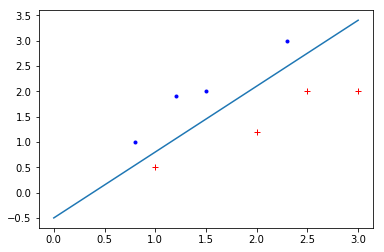

In [30]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt
train_data_x1 = np.array([1, 2, 2.5, 3])
train_data_x2 = np.array([0.5, 1.2, 2, 2])
train_data_x1_neg = np.array([1.5,2.3, 1.2, 0.8])
train_data_x2_neg = np.array([2, 3, 1.9, 1])

plt.figure()
plt.plot(train_data_x1, train_data_x2 ,'+', c = 'r')
plt.plot(train_data_x1_neg, train_data_x2_neg,'.', c = 'b')

x1 = np.linspace(0.0, 3, num = 100)
c = 1
#2.6*x1 - 2*x2 - 1 = 0
#2*x2 = 2.6*x1 - 1
x2 = 2.6/2 *x1 - c/2
plt.plot(x1, x2)
plt.show()

* As plotted above, the training error is 0 because the line clearly classifies the data points.

In [31]:
def function(x1, x2):
    return 2.6*x1 - 2*x2 - 1
print(function(2, 2.7))
print(function(2.5, 1))
print(function(1.5, 2.5))
print(function(1.2, 1))



-1.2000000000000002
3.5
-2.0999999999999996
0.1200000000000001


So we see that (2.7, 2.7) is perdicted as -1<br>
(2.5, 1) is predicted as 1
<br>(1.5, 2.5) is predicted as -1
<br>(1.2, 1) is predicted as 1
<br> Thus, we have the testing error = $\frac{2}{4} = 0.5$

**2d:** Comparing the error rate of KNN and linear classifier, we can see that in this case KNN does a better job in classifying the testing data set as KNN is a non-parametric method which is more flexible than linear classifer (which assumes that the data has a linear relationship).

# Question 3
**3a: ** Using K-means algorithm with k = 2, we randomly choose two points to be our initial centroids and examine(cluster) each point w.r.t these two centroids. Then we calculate the means of each cluster and assign that point to be our new centroid and repeating the above process until the centroids stay relatively stable. Please refer to the graph below.

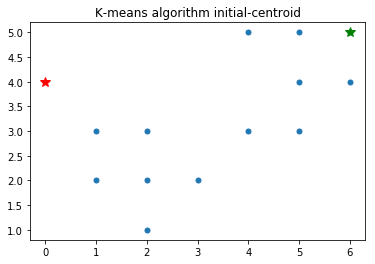

In [32]:
import numpy as np
from matplotlib import pyplot as plt
x1 = np.array([1, 1, 2, 2, 2, 3, 5, 4, 4, 5, 5, 6, 6])
x2 = np.array([3, 2, 1, 2, 3, 2, 3, 3, 5, 4, 5, 4, 5])
initial_centroid_1 = np.array([0, 4])
initial_centroid_2 = np.array([6, 5])
'''
    functions for implementing k-means algorithm
'''
def euclidean_distance(centroid, x1, x2):
    return np.sqrt((x1-centroid[0])**2 + (x2-centroid[1])**2)

def cluster(x1, x2, centroid_1, centroid_2):
    for i in range(0,len(x1)):
        if euclidean_distance(centroid_1, x1[i], x2[i]) < euclidean_distance(centroid_2, x1[i], x2[i]):
            red_list_x1.append(x1[i])
            red_list_x2.append(x2[i])
            plt.plot(x1[i], x2[i], '.', c = 'red', markersize = '10')
        else:
            green_list_x1.append(x1[i])
            green_list_x2.append(x2[i])
            plt.plot(x1[i], x2[i], '.', c = 'green', markersize = '10')

def find_new_centroids(rx1, rx2, gx1, gx2):
    new_centroid_1 = [np.mean(rx1), np.mean(rx2)]
    new_centroid_2 = [np.mean(gx1), np.mean(gx2)]
    return [new_centroid_1, new_centroid_2]

def plot_k_means(x1, x2, centroid_1, centroid_2):
    cluster(x1, x2, centroid_1, centroid_2)
    plt.plot(centroid_1[0], centroid_1[1], '*', c = 'red', markersize = '10')
    plt.plot(centroid_2[0], centroid_2[1], '*', c = 'green', markersize = '10')
    new_centroids = find_new_centroids(red_list_x1, red_list_x2, green_list_x1, green_list_x2)
    return new_centroids
    plt.show()

plt.plot(x1, x2, '.', markersize = '10')
plt.plot(initial_centroid_1[0], initial_centroid_1[1], '*', c = 'red', markersize = '10')
plt.plot(initial_centroid_2[0], initial_centroid_2[1], '*', c = 'green', markersize = '10')
plt.title('K-means algorithm initial-centroid')
plt.gca()
plt.show()

centroid_1 = initial_centroid_1
centroid_2 = initial_centroid_2
red_list_x1 = []
red_list_x2 = []
green_list_x1 = []
green_list_x2=[]




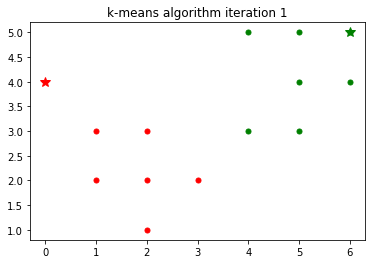

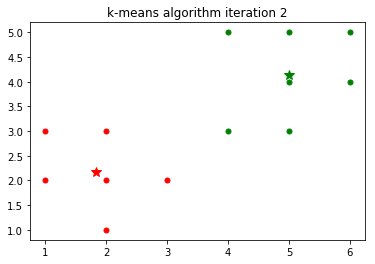

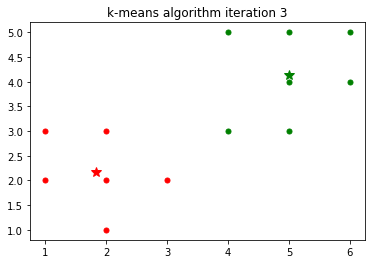

In [33]:
centroids = [initial_centroid_1, initial_centroid_2]
for i in range (0, 3):
    plt.figure()
    centroids = plot_k_means(x1, x2, centroids[0], centroids[1])
    plt.title('k-means algorithm iteration {0}'.format(i+1))

* We see after 3 iterations, the centroids converge to certain points

**3b: ** 
* Let's choose an arbitrary point **(2, 2)** denoted as **p**. <br>
This point is a core point as
$$N_{1.5}(p) = \{(1, 3), (1, 2), (2, 1), (2, 3), (3, 2)\}$$ and $$|N_{1.5}(p)| = 5 \geq Minpts = 2\  (core\ point\ condition)$$
So (1,3), (1, 2), (2, 1), (2, 3), (3, 2) are all **directly density-reachable** points from **p.**<br>


* Now we retrieve all points **density-reachable** from **p.**<br> 
Note (4, 3) is **density-reachable** from **p** as (3, 2) is directly **density-reachable** from **p** and (4, 3) is **directly density-reachable** from (3, 2) since $$(4, 3) \in N_{1.5}(3, 2) = \{ (2, 3), (2, 2), (2, 1), (4, 3)\}$$ which has $$|N_{1.5}(3, 2)| = 4 \geq Minpts = 2\  (core\ point\ condition)$$<br>
(4, 3) is also a core point as $$N_{1.5}(4, 3) = \{(3, 2), (5, 3), (5, 4)\}$$  and $$|N_{1.5}(4, 3)| = 3 \geq Minpts = 2\  (core\ point\ condition)$$<br>
Thus (5, 4) is **directly density-reachable** from (4, 3) and as (4, 3) is **directly density-reachable** from (3, 2), (3, 2) is **density-reachable** from **p**, (5, 4) is ultimately **density-reachable** from  **p**. <br>
Now we see that (5, 4) is also a core point as  $$N_{1.5}(5, 4) = \{(4, 4), (5, 3), (4, 5), (5, 5), (6, 4), (6, 5)\}$$  and $$|N_{1.5}(5, 4)| = 6 \geq Minpts = 2\  (core\ point\ condition)$$<br> So (4, 4), (5, 3), (4, 5), (5, 5), (6, 4), (6, 5) are all **directly density-reachable** from (5, 4) which means that these points are **density-reachable** from **p** according to our previous reasoning.


* Hence, we obtain that all the points in the graph are density-reachable from **p** and as **p** is a core point, then the cluster is formed which contains all the points.

**3c: ** In the begining, each point is a single cluster. It joins the nearest cluster using single link. We see from the graph that the distance between the points in the first step is 1. After several iteration, we form two clusters which has the single link = $\sqrt2$. This is expressed as the height in the dendrogram. Due to the scipy implementation of dendrogram of breaking ties, it chooses to join all the clusters with equal single link rather than randomly choosing one cluster, we get the following graph:

{'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g'],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0],
  [1.0, 1.4142135623730951, 1.4142135623730951, 1.0]],
 'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [75.0, 75.0, 94.375, 94.375],
  [65.0, 65.0, 84.6875, 84.6875],
  [14.6875, 14.6875, 74.84375, 74.84375]],
 'ivl': [6, 5, 3, 4, 1, 2, 13, 12, 9, 11, 10, 7, 8],
 'leaves': [5, 4, 2, 3, 0, 1, 12, 11, 8, 10, 9, 6, 7]}

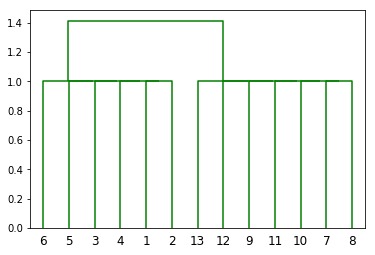

In [34]:
import scipy.cluster.hierarchy as hac
a = np.array([[1, 3],
             [1, 2],
             [2, 1],
             [2, 2],
             [2, 3],
             [3, 2],
             [5, 3],
             [4, 3],
             [4, 5],
             [5, 4],
             [5, 5],
             [6, 4],
             [6, 5]]
             )
z = hac.linkage(a, method='single', metric='euclidean')
hac.dendrogram(z,
           color_threshold=3,
           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13],
           show_leaf_counts=True)